In [5]:
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

In [2]:
path = r"C:\Users\admin\Documents\WeChat Files\liucouhua\FileStorage\File\2020-06\1111111.json"

In [3]:
file = open(path,encoding = "utf-8")
mess = file.read()
mess = mess.replace("'", "\"")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Documents\\WeChat Files\\liucouhua\\FileStorage\\File\\2020-06\\1111111.json'

In [ ]:
mess

In [ ]:
file_w = open(r"C:\Users\admin\Documents\WeChat Files\liucouhua\FileStorage\File\2020-06\da.json","w")

In [ ]:
file_w.write(mess)
file_w.close()

In [ ]:
path = r"C:\Users\admin\Documents\WeChat Files\liucouhua\FileStorage\File\2020-06\da.json"
with open(path,'r')as fp:
    json_data = json.load(fp)
    print('这是文件中的json数据：',json_data)
    print('这是读取到文件数据的数据类型：', type(json_data))

In [ ]:
data = json_data["data"]["gisRainList"]

In [ ]:
df = pd.DataFrame(data)
df1 = df[["stationId","lon","lat","val"]]

In [ ]:
sta = meb.sta_data(df1,["id","lon","lat","data0"])
meb.io.write_stadata_to_micaps3(sta,r"H:\task\develop\java\OAL\等值面测试数据\data0621.txt")

In [ ]:
path = r"H:\test_data\divide.txt"

In [ ]:
import pandas as pd
df = pd.read_csv(path,header = None,sep =";")

In [ ]:
df

In [ ]:
df.columns= ["id","lon","lat","alt","en_name","ch_name","region_id"]

In [ ]:
import meteva

In [ ]:
sta = meteva.base.sta_data(df[["id","lon","lat","alt"]])

In [ ]:
sta

In [ ]:
sta.loc[sta["alt"] == 9999,"alt"] = 999999

In [ ]:
sta

In [ ]:
meteva.base.io.write_stadata_to_micaps3(sta,r"H:\resource\infomation-dat\station_global_11621.txt")

In [ ]:
df["name"] = "None"

In [ ]:
for i in range(len(df.index)):
    if df.iloc[i,5] != '9999':
        df.iloc[i,7] = df.iloc[i,5]
    elif df.iloc[i,4] != '9999':
        df.iloc[i,7] = df.iloc[i,4]

In [ ]:
df

In [ ]:
df.sort_values(by="id",inplace=False)

In [ ]:
df.loc[df["alt"] == 9999,"alt"] = 999999

In [ ]:
sta = meteva.base.sta_data(df[["id","lon","lat","alt"]])

In [ ]:
meteva.base.io.write_stadata_to_micaps3(sta,r"H:\resource\infomation-dat\station_global_11621.txt",effectiveNum=3)

In [ ]:
region_id = meteva.base.sta_data(df[["id","lon","lat","region_id"]])

In [ ]:
meteva.base.io.write_stadata_to_micaps3(region_id,r"H:\resource\infomation-dat\region_id_global_11621.txt",effectiveNum=3)

In [ ]:
df["name"]

In [ ]:
import pkg_resources
station_id_name_dict = meteva.base.tool.get_station_id_name_dict(pkg_resources.resource_filename('meteva', "resources/stations/station_id_pro_county.txt"))

In [ ]:
station_id_name_dict

In [ ]:
for i in range(len(df.index)):
    id1 = sta.iloc[i,3]
    if id1 not in station_id_name_dict.keys():
        name = df.iloc[i,-1]
        names = name.split(",")
        if len(names) == 1:
            names_s = names[0].split("_")
        
            if len(names_s) == 1:
                name1 = names_s[0] + "_"+"None"
            else:
                name1 = names_s[-2] + "_" + names_s[-1]
        else:
            name1 = names[-2] + "_" + names[-1]
        station_id_name_dict[id1] = name1

In [ ]:
station_id_name_dict

In [ ]:
strings = ""
for id in station_id_name_dict.keys():
    name = station_id_name_dict[id]
    names = name.split("_")
    names[0] = names[0].replace(" ","_")
    strings += str(id) + " " + names[0]+" "+ names[1] +"\n"
print(strings)

In [ ]:
file = open(r"H:\test_data\station_id_pro_county.txt","w",encoding = "utf-8")
file.write(strings)
file.close()

In [6]:
import meteva
meteva.base.station_id_name_dict

{50136: '黑龙江_漠河',
 50137: '黑龙江_北极村',
 50246: '黑龙江_塔河',
 50247: '黑龙江_呼中',
 50349: '黑龙江_新林',
 50353: '黑龙江_呼玛',
 50425: '内蒙古_额尔古纳市',
 50431: '内蒙古_根河市',
 50434: '内蒙古_图里河',
 50442: '黑龙江_加格达奇',
 50445: '内蒙古_鄂伦春自治旗',
 50468: '黑龙江_爱辉',
 50514: '内蒙古_满洲里',
 50524: '内蒙古_陈巴尔虎旗',
 50525: '内蒙古_鄂温克族自治旗',
 50526: '内蒙古_牙克石市',
 50527: '内蒙古_海拉尔',
 50548: '内蒙古_小二沟',
 50557: '黑龙江_嫩江',
 50564: '黑龙江_孙吴',
 50566: '黑龙江_逊克',
 50603: '内蒙古_新巴尔虎右旗',
 50618: '内蒙古_新巴尔虎左旗',
 50632: '内蒙古_博克图',
 50639: '内蒙古_扎兰屯',
 50645: '内蒙古_莫力达瓦达斡尔',
 50646: '黑龙江_讷河',
 50647: '内蒙古_阿荣旗',
 50655: '黑龙江_五大连池',
 50656: '黑龙江_北安',
 50658: '黑龙江_克山',
 50659: '黑龙江_克东',
 50673: '黑龙江_嘉荫',
 50674: '黑龙江_乌伊岭',
 50727: '内蒙古_阿尔山',
 50739: '黑龙江_龙江',
 50741: '黑龙江_甘南',
 50742: '黑龙江_富裕',
 50745: '黑龙江_齐齐哈尔',
 50749: '黑龙江_林甸',
 50750: '黑龙江_依安',
 50755: '黑龙江_拜泉',
 50756: '黑龙江_海伦',
 50758: '黑龙江_明水',
 50767: '黑龙江_绥棱',
 50772: '黑龙江_五营',
 50774: '黑龙江_伊春',
 50775: '黑龙江_鹤岗',
 50776: '黑龙江_萝北',
 50778: '黑龙江_同江',
 50779: '黑龙江_抚远',
 50787: '黑龙江_绥滨',
 50788: '黑龙江_富锦',

In [9]:
path = r"X:\For Verification\GRID_1W\2020050100\r2m\2020050100.003.h5"
pd.read_hdf(path)

,level,time,dtime,id,lon,lat,data0
0,NaN,2020-05-01,3,86,311.862701,-15.935100,71.767975
1,NaN,2020-05-01,3,1001,351.333313,70.918098,71.432144
2,NaN,2020-05-01,3,1002,16.250000,80.050797,86.621620
3,NaN,2020-05-01,3,1003,15.500000,77.000000,95.262695
4,NaN,2020-05-01,3,1004,11.917200,78.917198,76.888931
...,...,...,...,...,...,...,...
11616,NaN,2020-05-01,3,7105022,190.449997,-19.030001,85.280716
11617,NaN,2020-05-01,3,7105023,301.899994,6.460000,98.255859
11618,NaN,2020-05-01,3,7105024,15.140000,-4.140000,96.451210
11619,NaN,2020-05-01,3,7105025,13.200000,-8.500000,89.071289


In [10]:
pd.read_hdf(r"X:\For Verification\OBS\TEM\2020062503.h5")

,level,time,dtime,id,lon,lat,data0
0,NaN,2020-06-25 03:00:00,0,1008,15.501500,78.245300,6.500000
1,NaN,2020-06-25 03:00:00,0,1018,16.003000,69.241302,11.300000
2,NaN,2020-06-25 03:00:00,0,1027,18.909500,69.653801,10.100000
3,NaN,2020-06-25 03:00:00,0,1030,18.128799,69.289703,7.500000
4,NaN,2020-06-25 03:00:00,0,1036,20.415300,69.557602,10.600000
...,...,...,...,...,...,...,...
6811,NaN,2020-06-25 03:00:00,0,98550,125.019997,11.220000,30.400000
6812,NaN,2020-06-25 03:00:00,0,98646,123.970001,10.320000,30.200001
6813,NaN,2020-06-25 03:00:00,0,98751,125.129997,8.150000,30.000000
6814,NaN,2020-06-25 03:00:00,0,98752,125.470001,8.930000,32.599998


In [17]:
sta243  = pd.read_hdf(r"X:\For Verification\Station_243\2020062500\t2m\2020062500.003.h5")
sta243["level"] = 0
sta243["data0"] = 0
sta243["dtime"] = 0

In [23]:
meteva.base.io.write_stadata_to_micaps3(sta243,save_path = r"H:\resource\infomation-dat\sta243_alt.txt",effectiveNum=3)

True

In [24]:
sta243_alt = meteva.base.io.read_sta_alt_from_micaps3(r"H:\resource\infomation-dat\station_global_alt_11621.txt",sta243)

In [25]:
sta243_alt

,level,time,dtime,id,lon,lat,alt
0,0,2099-01-01,0,1492,11.200000,60.580002,94.0
1,0,2099-01-01,0,2464,18.580000,59.580002,15.0
2,0,2099-01-01,0,2974,25.620001,60.529999,51.0
3,0,2099-01-01,0,3334,358.200012,53.580002,69.0
4,0,2099-01-01,0,3772,359.920013,51.700001,24.0
...,...,...,...,...,...,...,...
238,0,2099-01-01,0,7105022,190.449997,-19.030001,999999.0
239,0,2099-01-01,0,7105023,301.899994,6.460000,999999.0
240,0,2099-01-01,0,7105024,15.140000,-4.140000,999999.0
241,0,2099-01-01,0,7105025,13.200000,-8.500000,999999.0


In [26]:
meteva.base.io.write_stadata_to_micaps3(sta243_alt,save_path = r"H:\resource\infomation-dat\sta243_alt.txt",effectiveNum=3)

True

In [27]:
sta_all =pd.read_hdf(r"F:\veri_report\global\t2m/week.h5","df")
sta_all_c = meb.sele_by_para(sta_all,value = [-100,100])

In [28]:
sta_all

,level,time,dtime,id,lon,lat,ob,station_243,station_243_blend,grid_243,darksky
0,999999.0,2020-06-25 00:00:00,3,1492,11.200000,60.580002,17.799999,15.490000,15.490000,14.468875,13.410000
1,999999.0,2020-06-25 00:00:00,3,2464,18.580000,59.580002,15.800000,16.059999,16.059999,16.733566,16.900000
2,999999.0,2020-06-25 00:00:00,3,2974,25.620001,60.529999,18.299999,18.600000,18.600000,18.116812,17.520000
3,999999.0,2020-06-25 00:00:00,3,3334,358.200012,53.580002,999999.000000,14.460000,14.460000,14.453975,19.250000
4,999999.0,2020-06-25 00:00:00,3,3772,359.920013,51.700001,999999.000000,18.540001,18.540001,17.831430,20.360001
...,...,...,...,...,...,...,...,...,...,...,...
176787,999999.0,2020-06-19 12:00:00,168,7105022,190.449997,-19.030001,999999.000000,25.690001,25.690001,25.409033,25.120001
176788,999999.0,2020-06-19 12:00:00,168,7105023,301.899994,6.460000,999999.000000,25.790001,25.790001,25.977148,26.469999
176789,999999.0,2020-06-19 12:00:00,168,7105024,15.140000,-4.140000,999999.000000,28.010000,28.010000,27.548750,29.450001
176790,999999.0,2020-06-19 12:00:00,168,7105025,13.200000,-8.500000,999999.000000,23.180000,23.180000,23.179688,23.889999


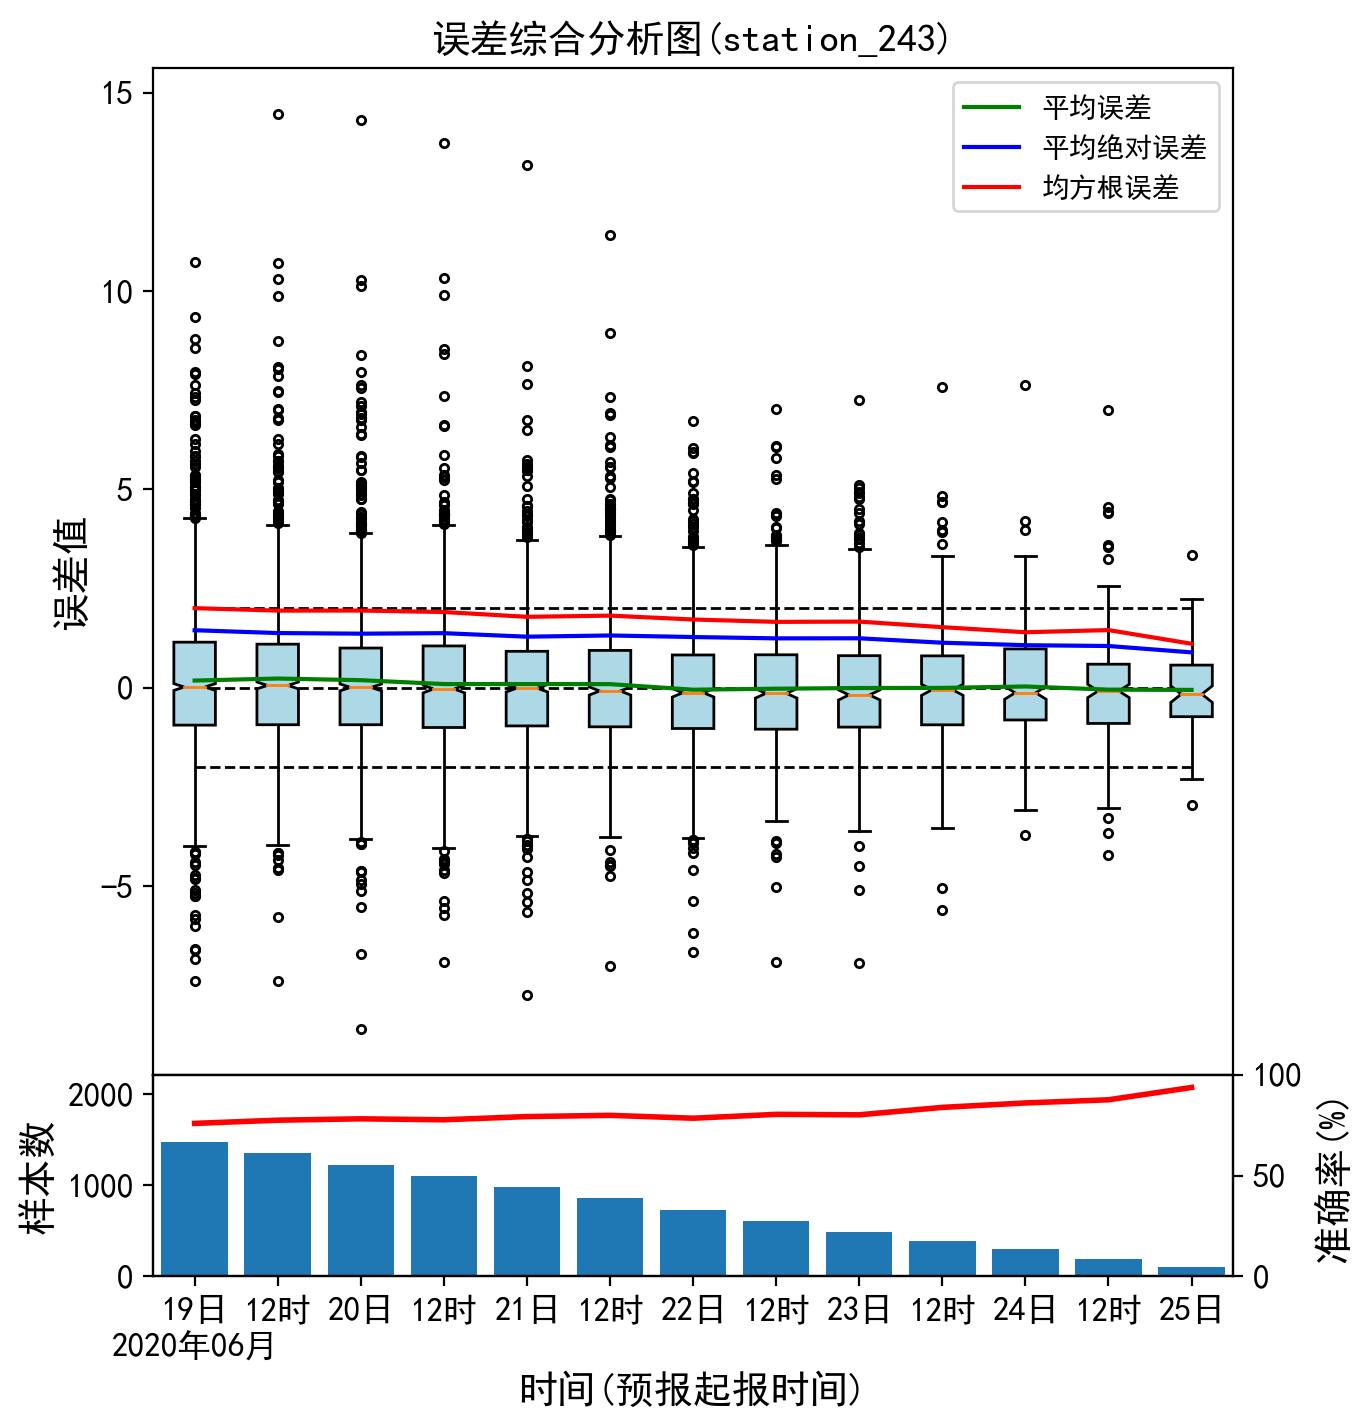

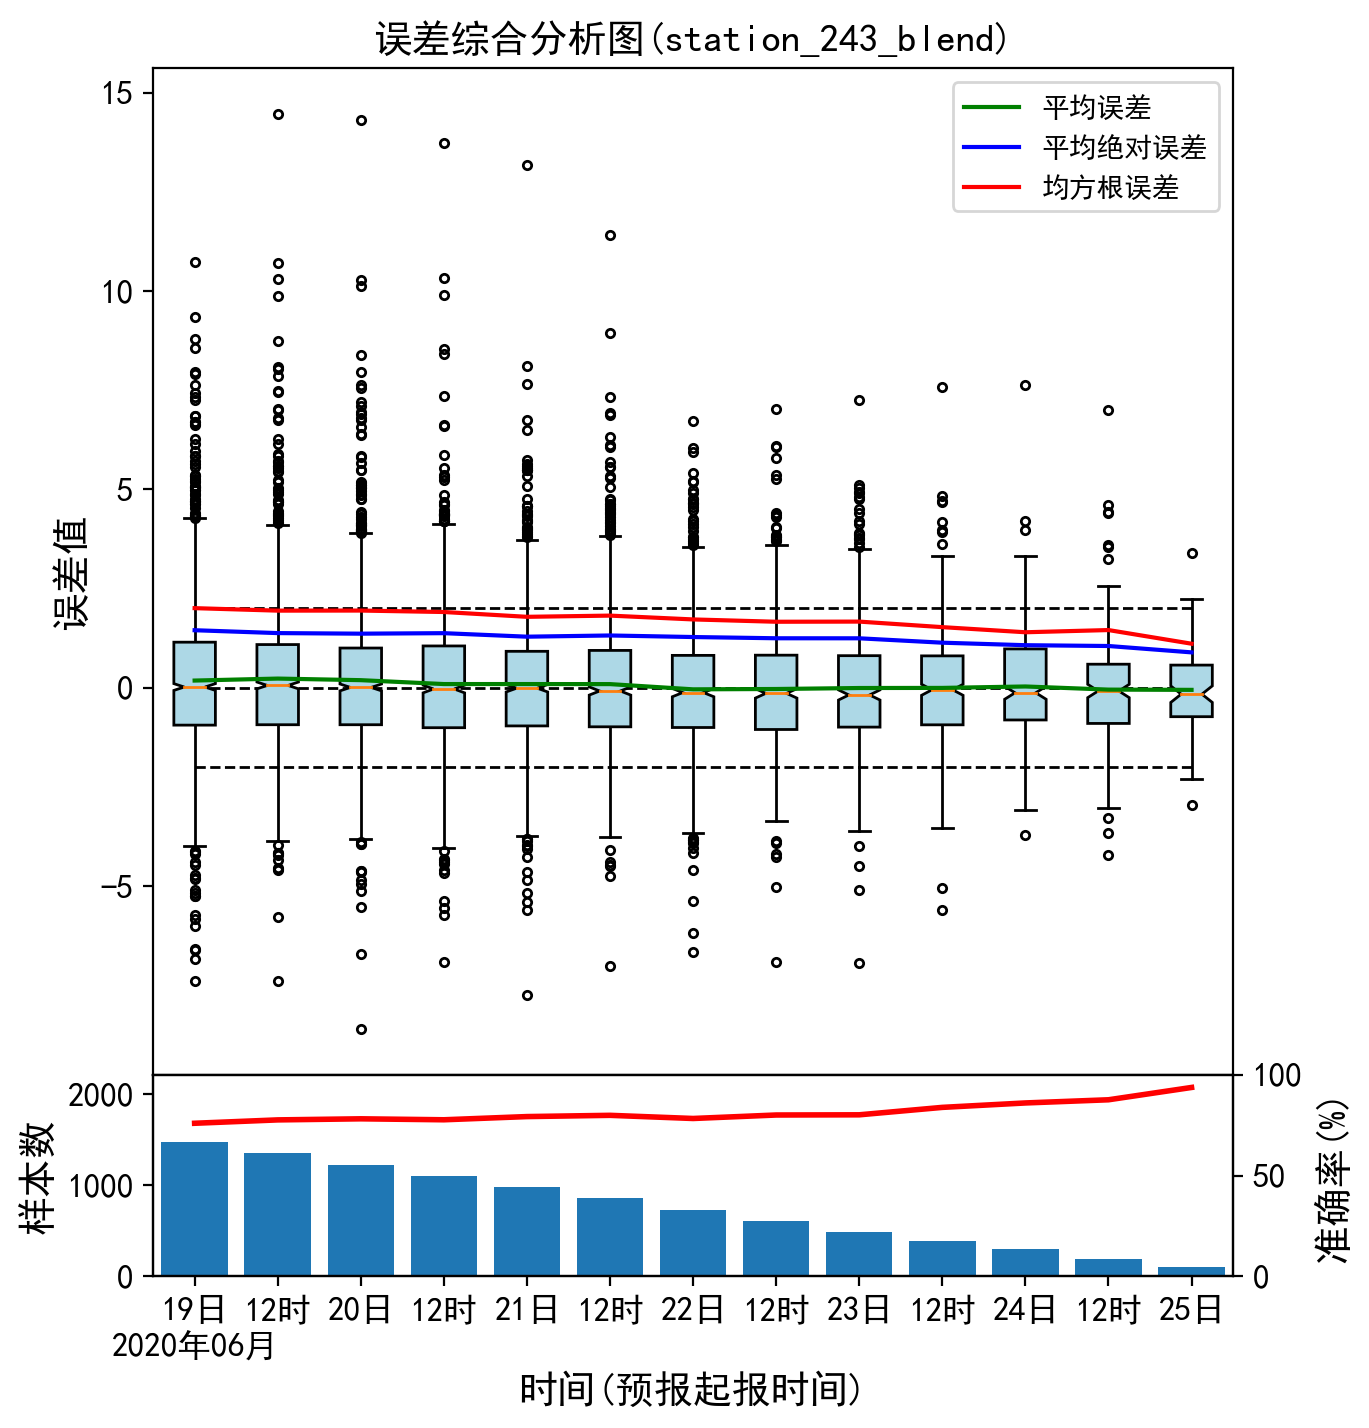

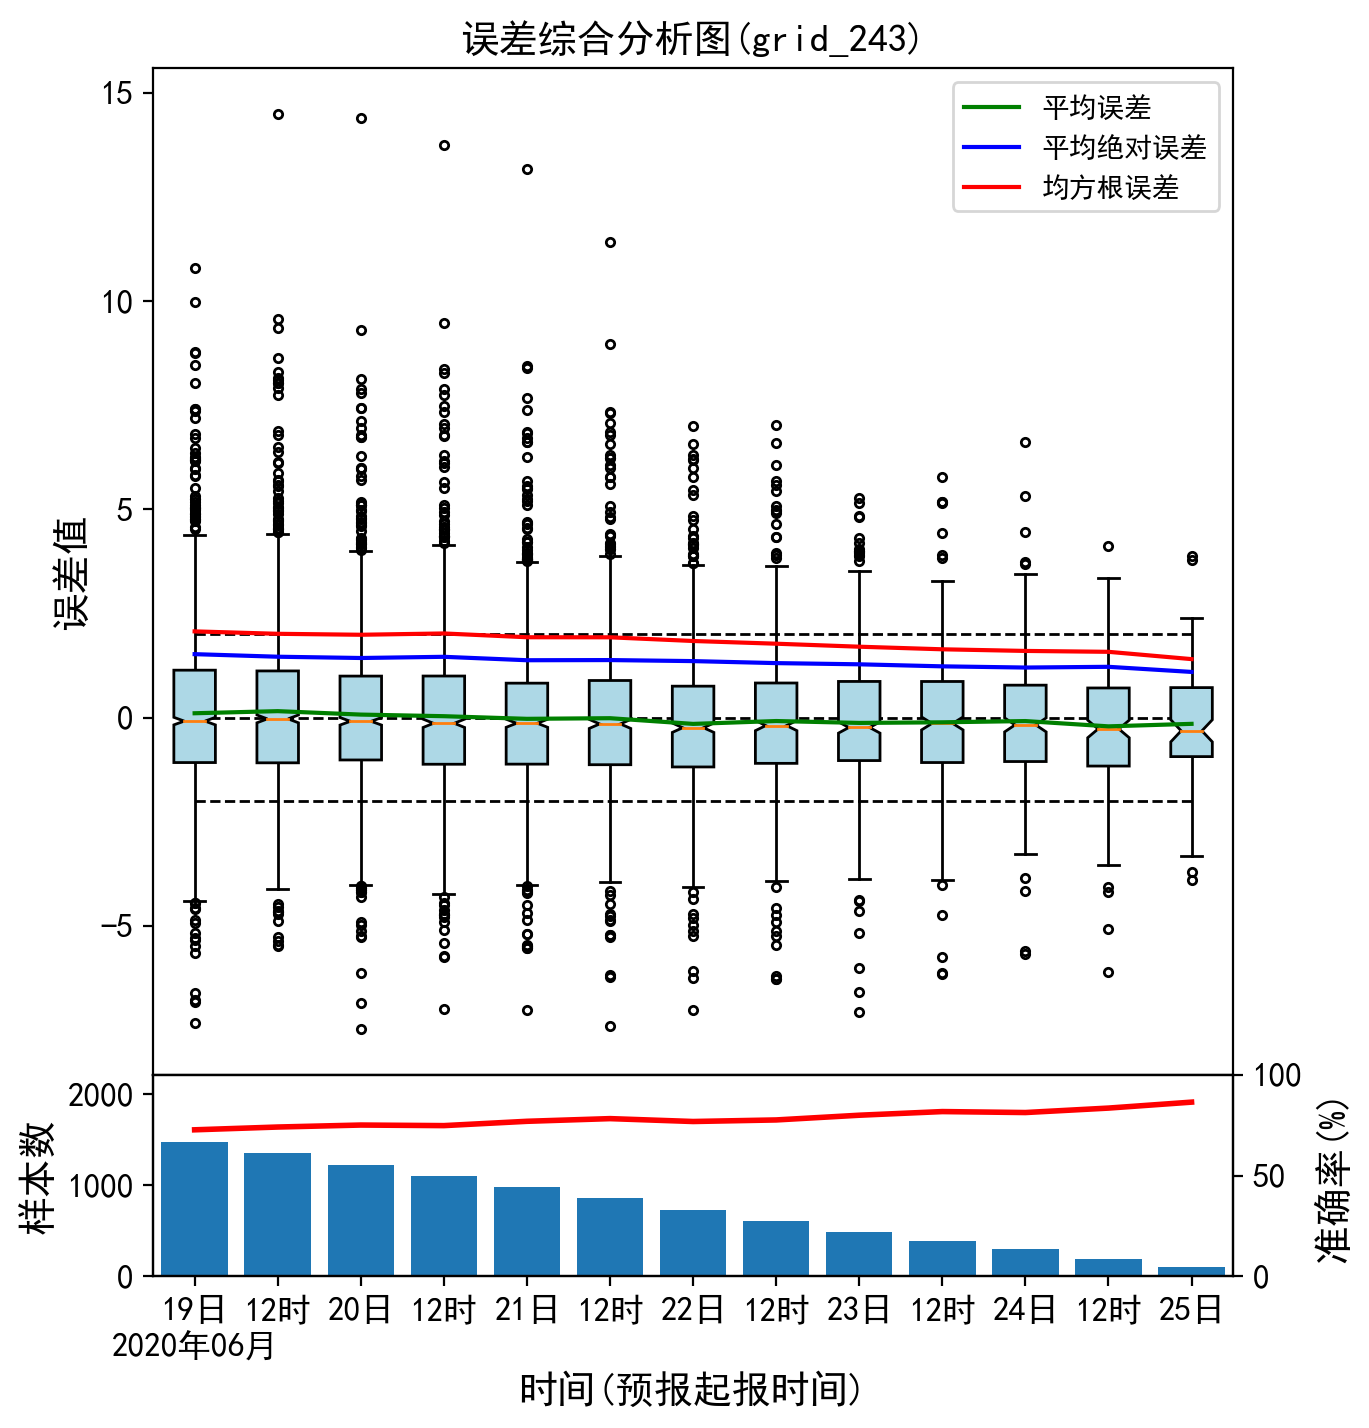

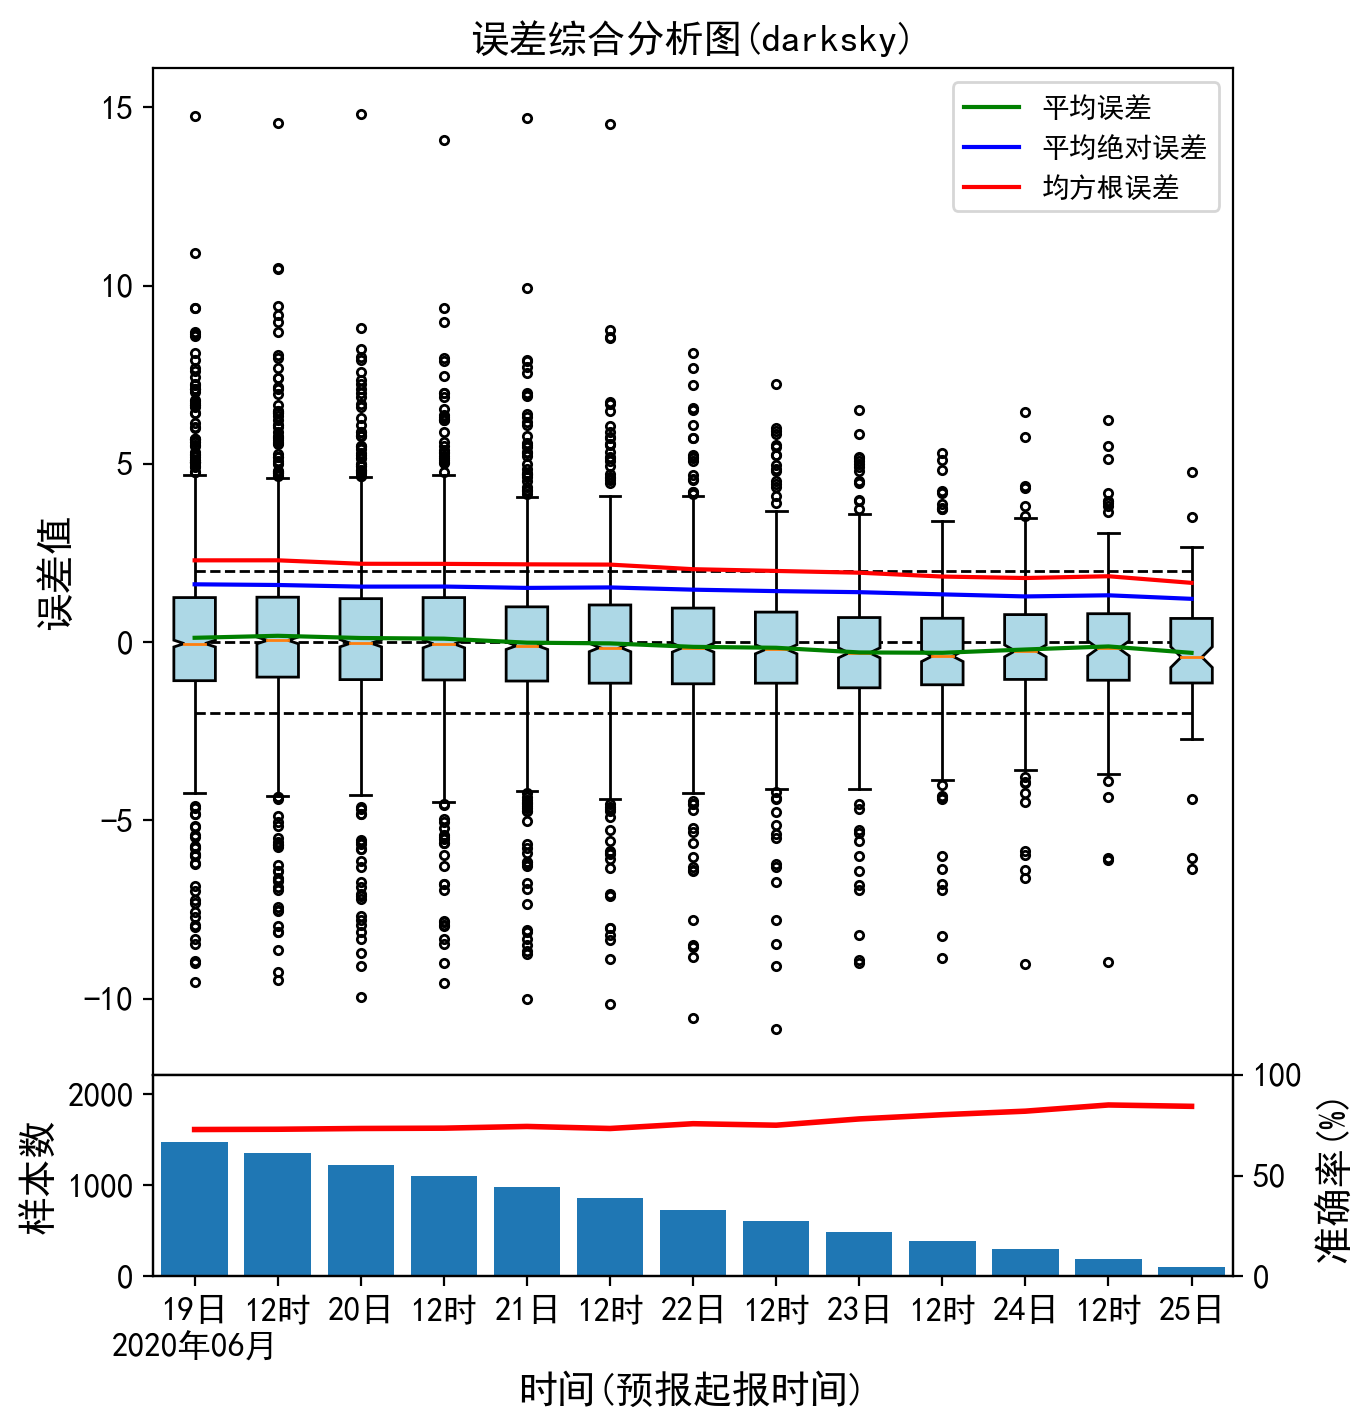

In [29]:
mpd.error_boxplot(sta_all_c,g = "time",threshold = 2)

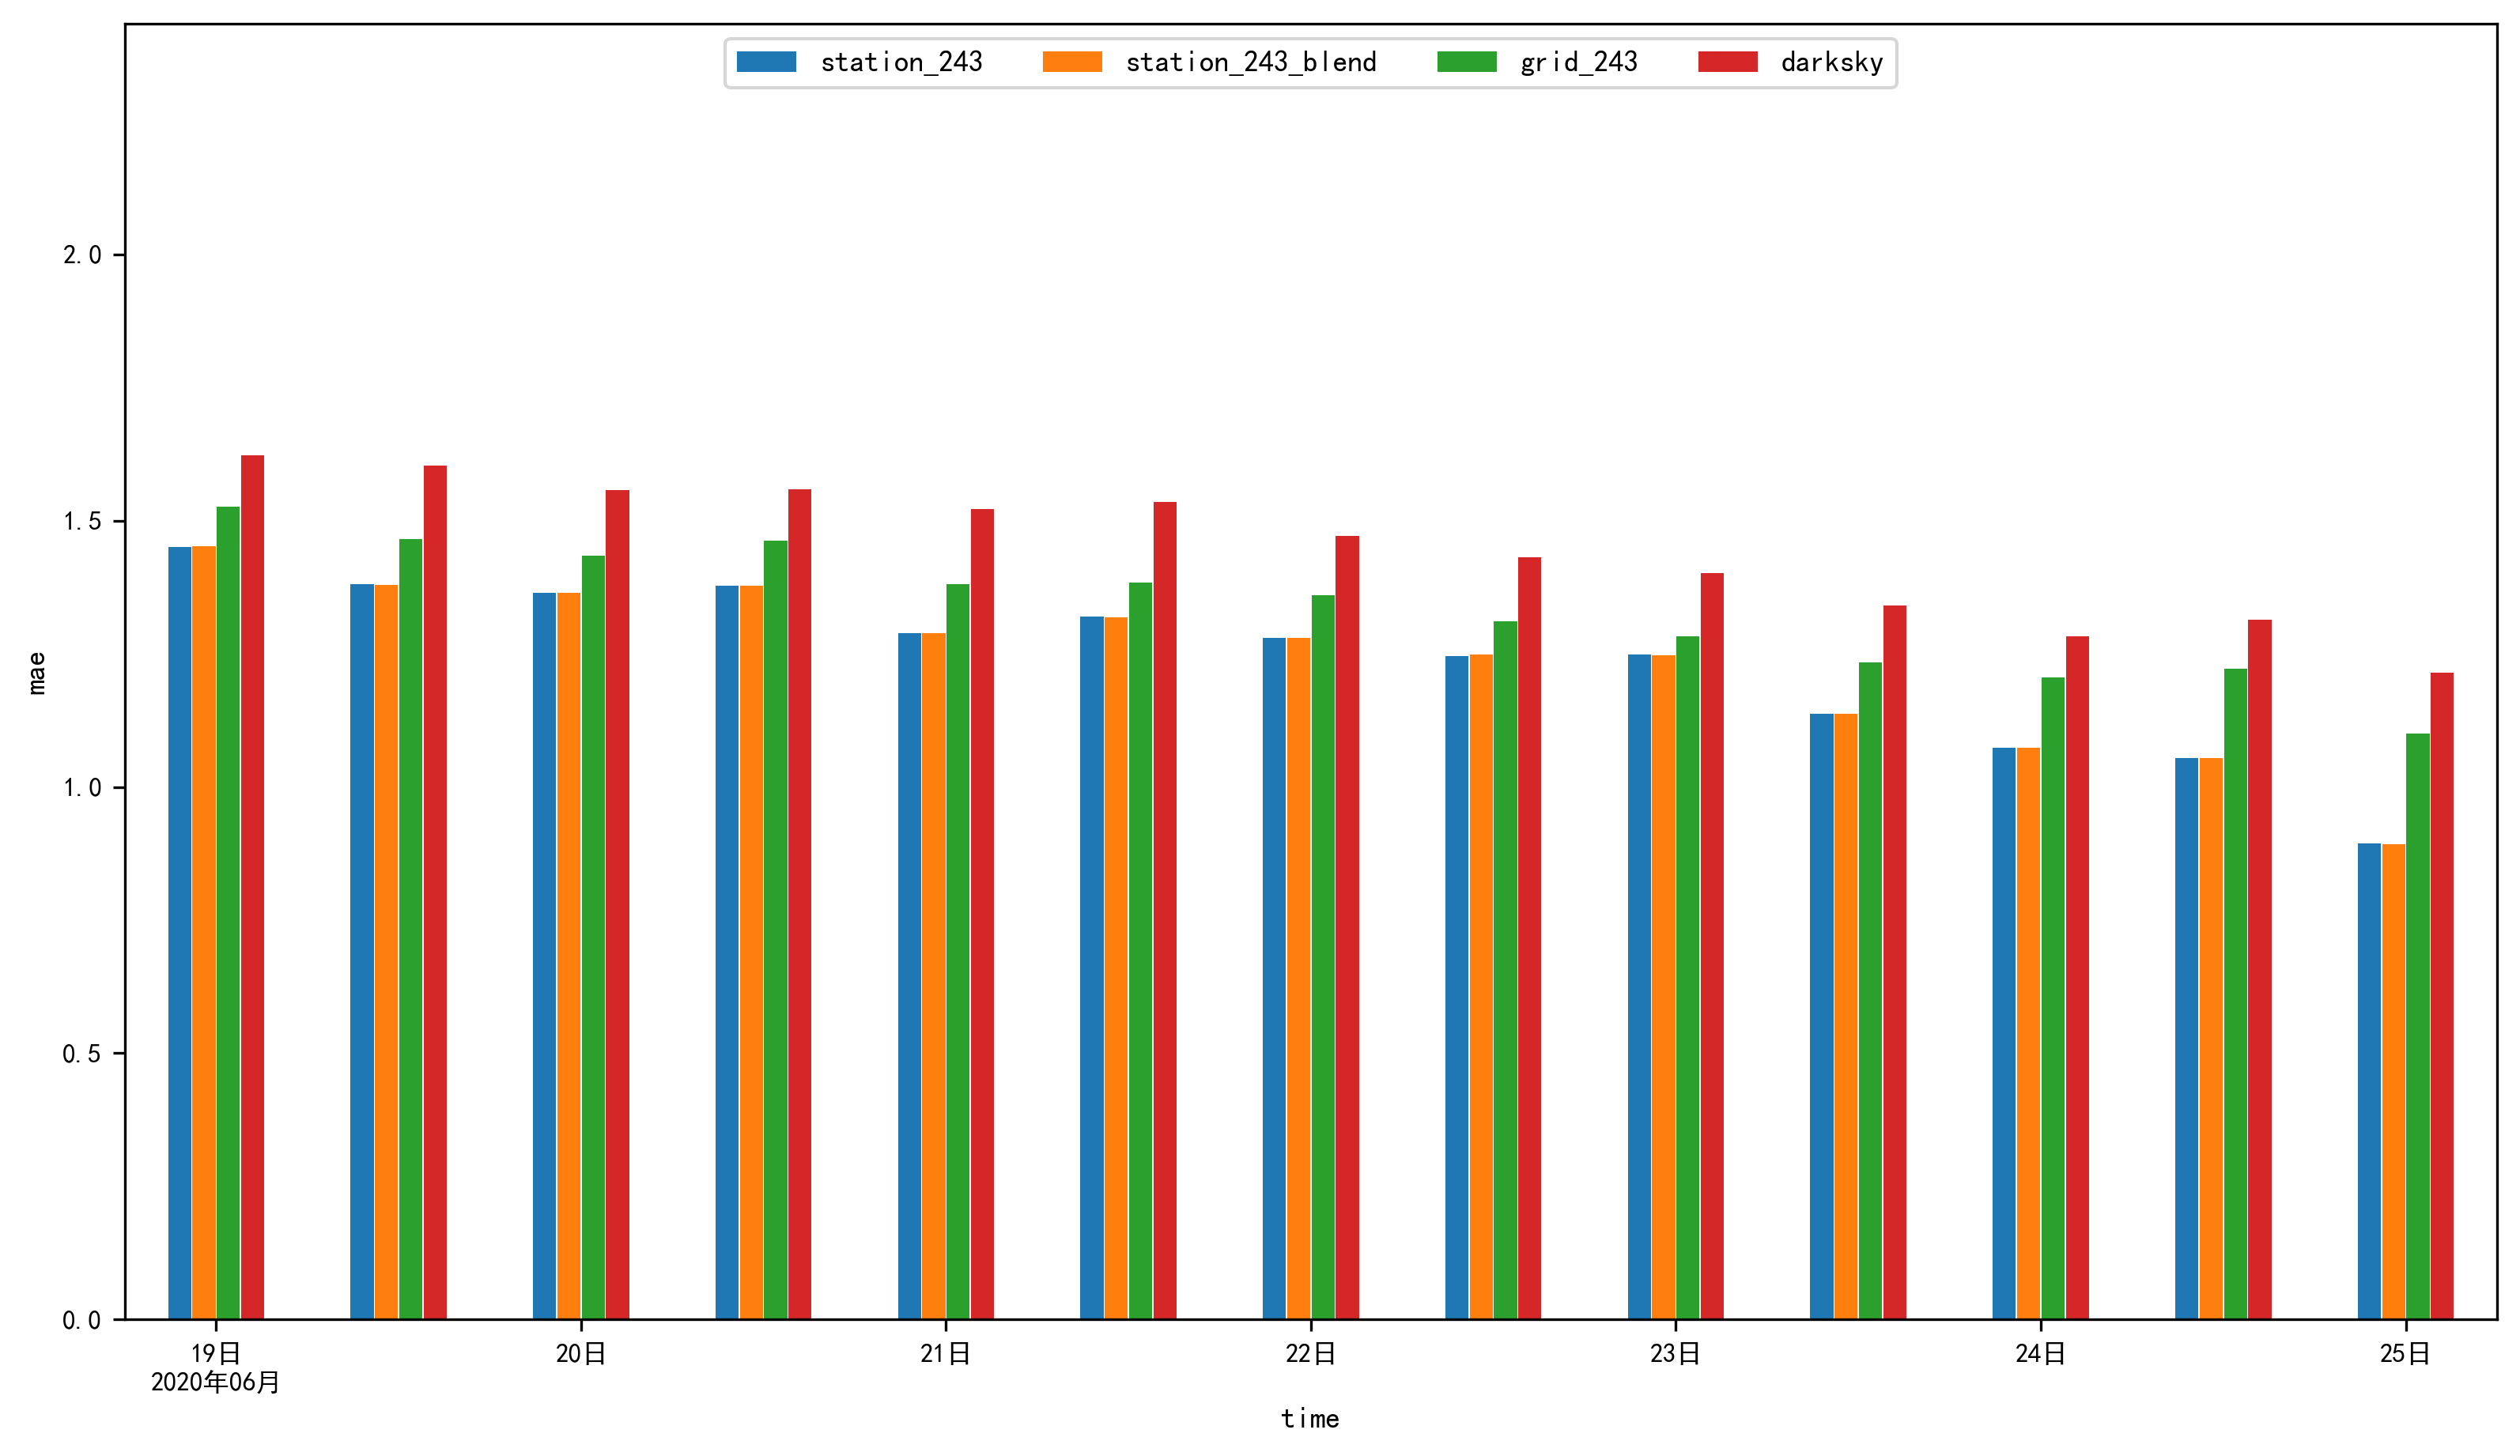

(array([[1.4510901, 1.4512188, 1.5262266, 1.62195  ],
        [1.3800664, 1.378952 , 1.464696 , 1.6029003],
        [1.3645113, 1.3645114, 1.433954 , 1.557215 ],
        [1.3771079, 1.3771895, 1.4626843, 1.559438 ],
        [1.2884693, 1.2884592, 1.3802811, 1.5210408],
        [1.3190538, 1.3189952, 1.3842114, 1.5346962],
        [1.279891 , 1.2797819, 1.3594402, 1.471444 ],
        [1.2461601, 1.2484477, 1.3112146, 1.4311764],
        [1.2479141, 1.2476686, 1.2824655, 1.401452 ],
        [1.1366407, 1.1370834, 1.2335483, 1.340078 ],
        [1.0738776, 1.0738776, 1.2048247, 1.2821429],
        [1.0535052, 1.0537628, 1.2223889, 1.3138144],
        [0.8932292, 0.8930208, 1.0994834, 1.2143748]], dtype=float32),
 [Timestamp('2020-06-19 00:00:00'),
  Timestamp('2020-06-19 12:00:00'),
  Timestamp('2020-06-20 00:00:00'),
  Timestamp('2020-06-20 12:00:00'),
  Timestamp('2020-06-21 00:00:00'),
  Timestamp('2020-06-21 12:00:00'),
  Timestamp('2020-06-22 00:00:00'),
  Timestamp('2020-06-22 12:00

In [30]:
mpd.score(sta_all_c,meteva.method.mae,g = "time",plot = "bar")

误差绝对值前1的站点：
id:71714   lon:289.03  lat:47.33 value:3.2480220794677734


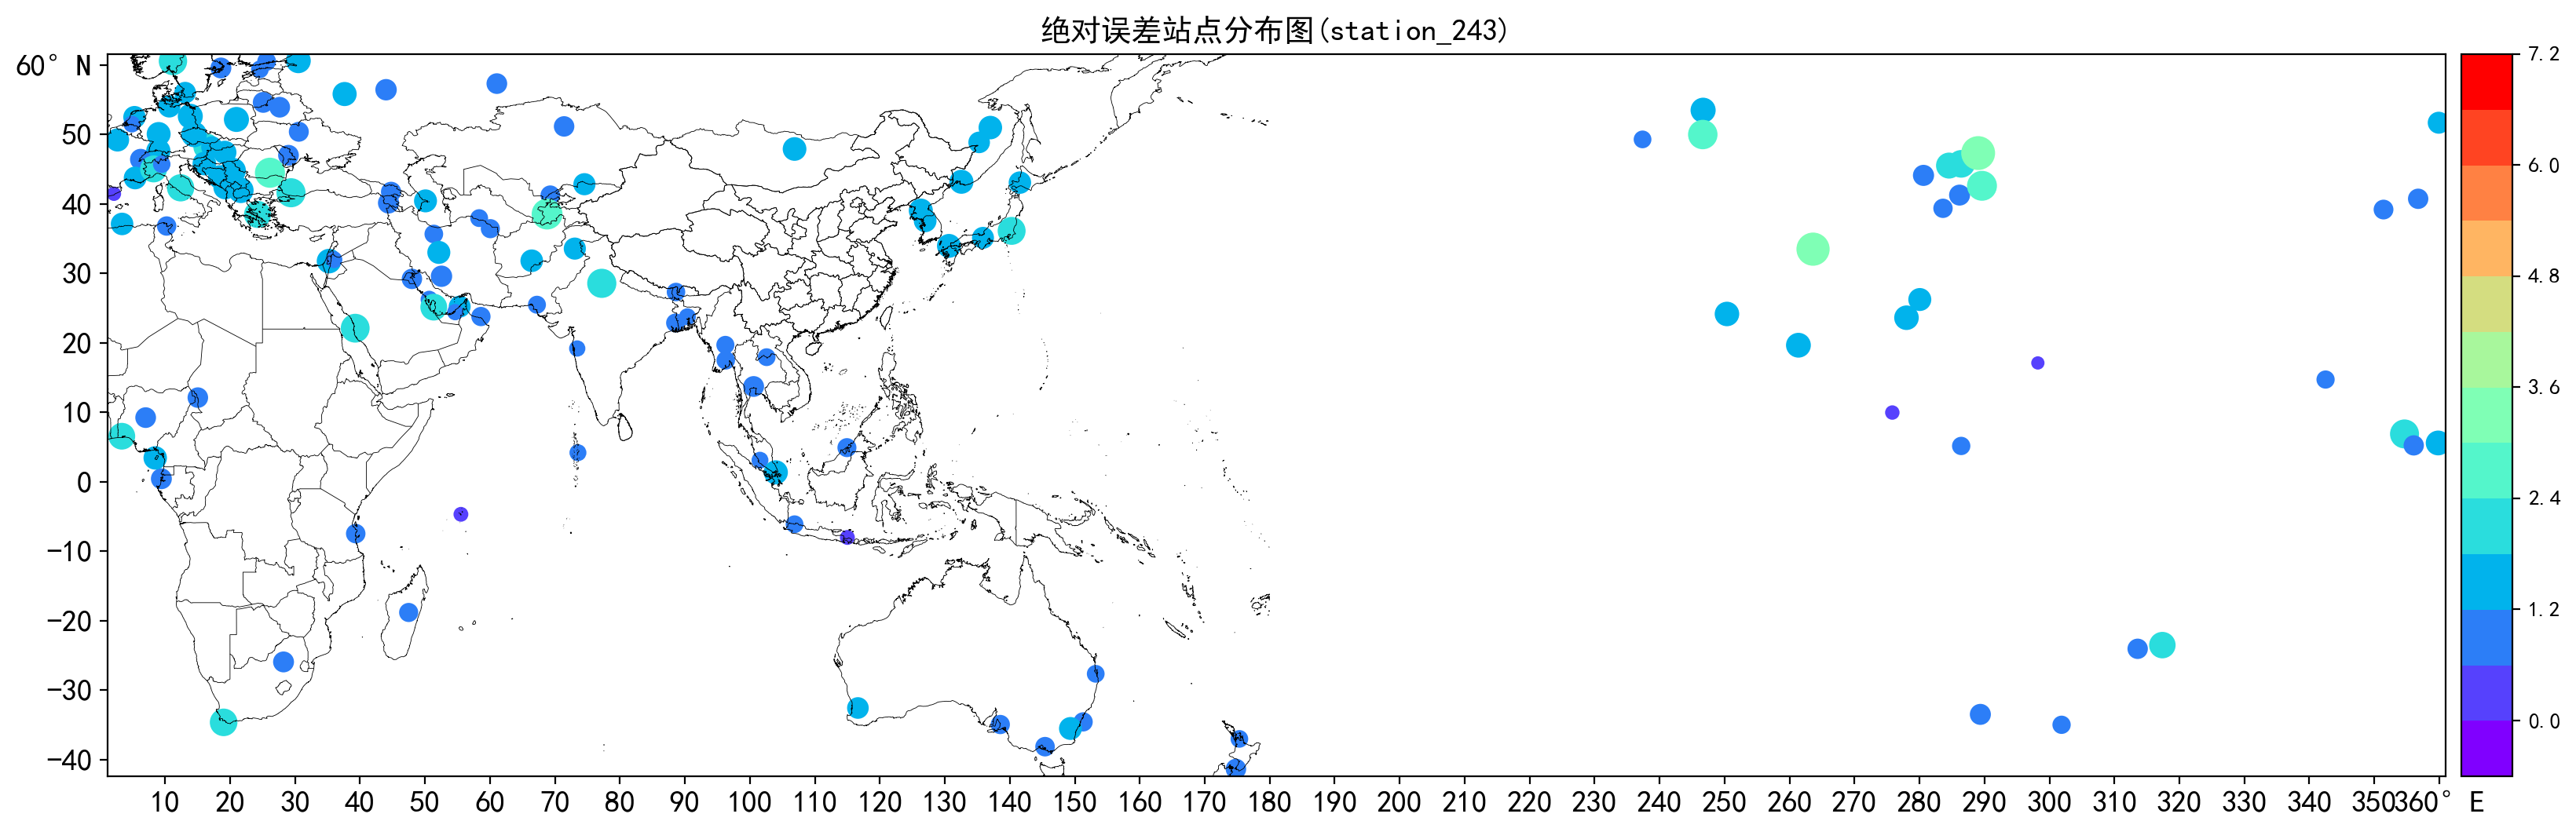

误差绝对值前1的站点：
id:71714   lon:289.03  lat:47.33 value:3.2480220794677734


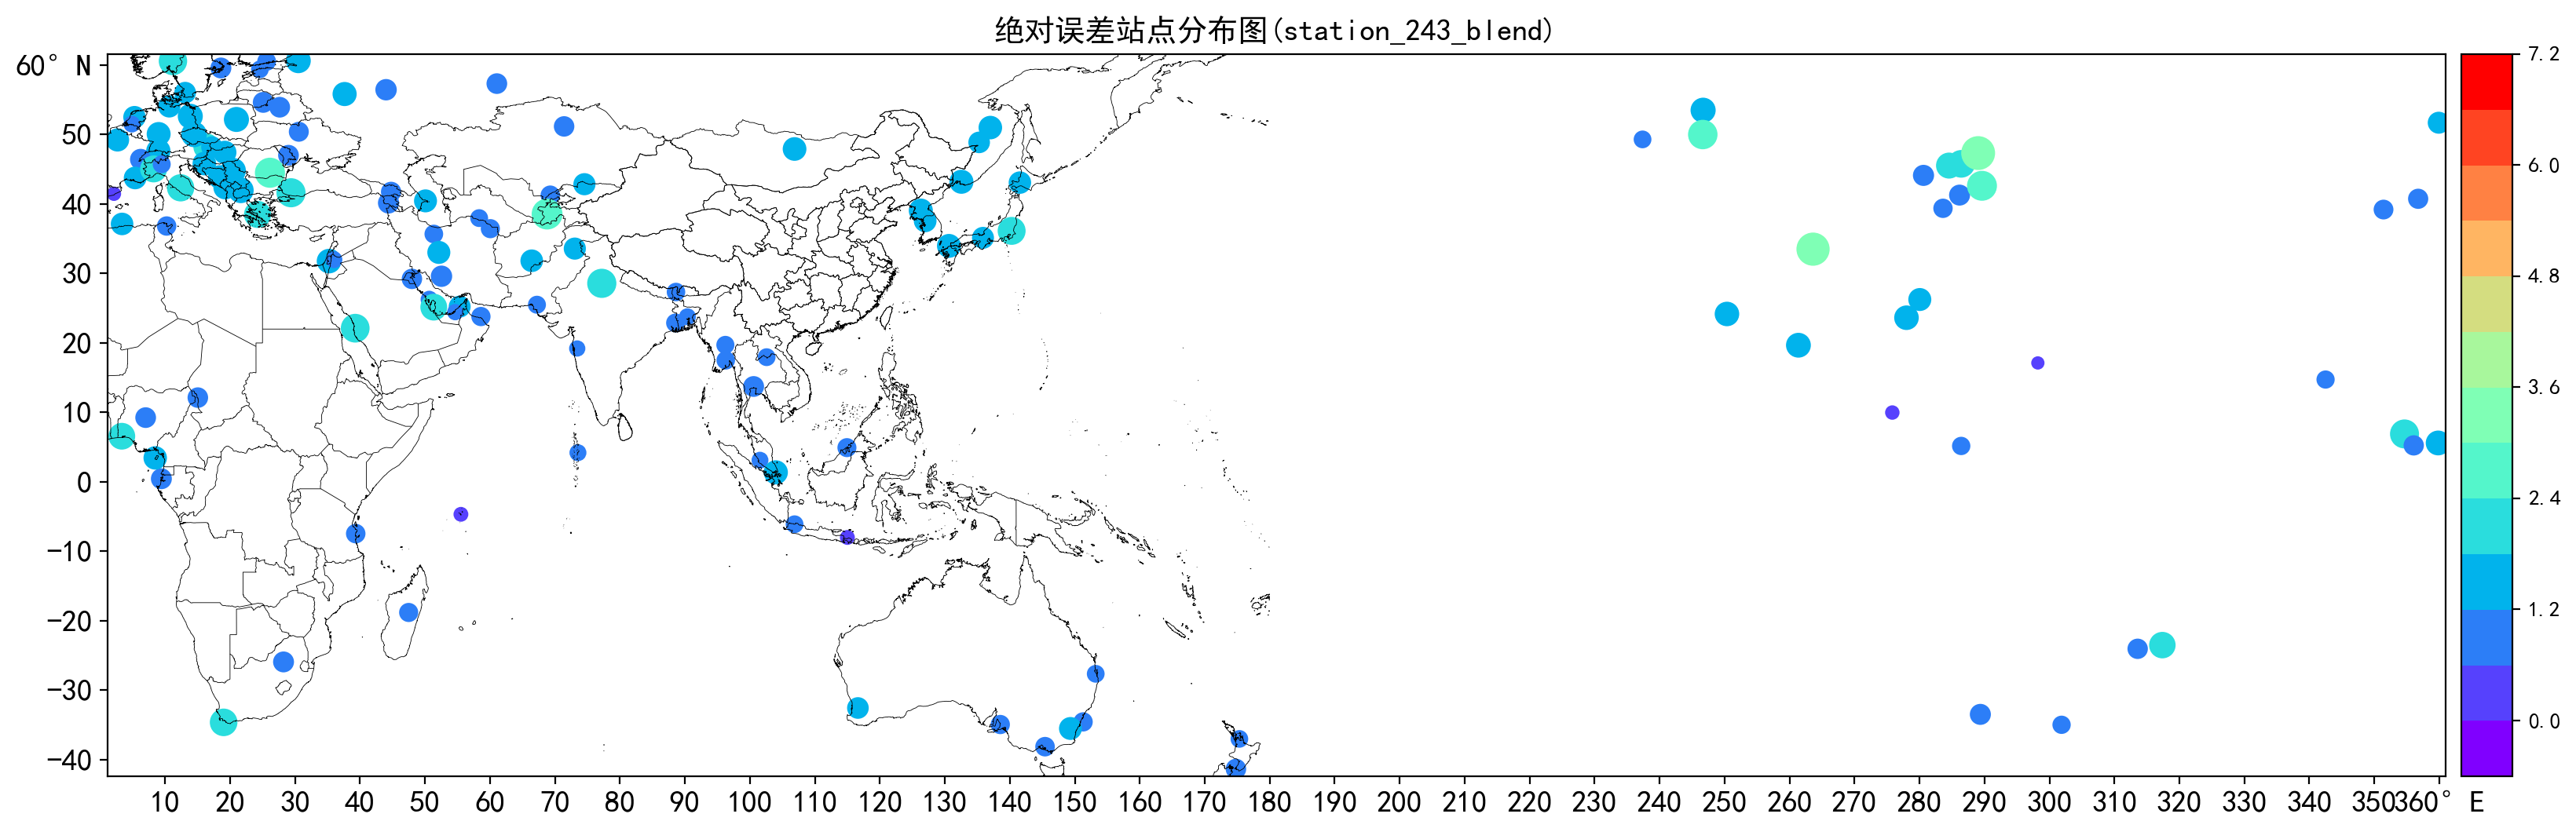

误差绝对值前1的站点：
id:71714   lon:289.03  lat:47.33 value:4.158616065979004


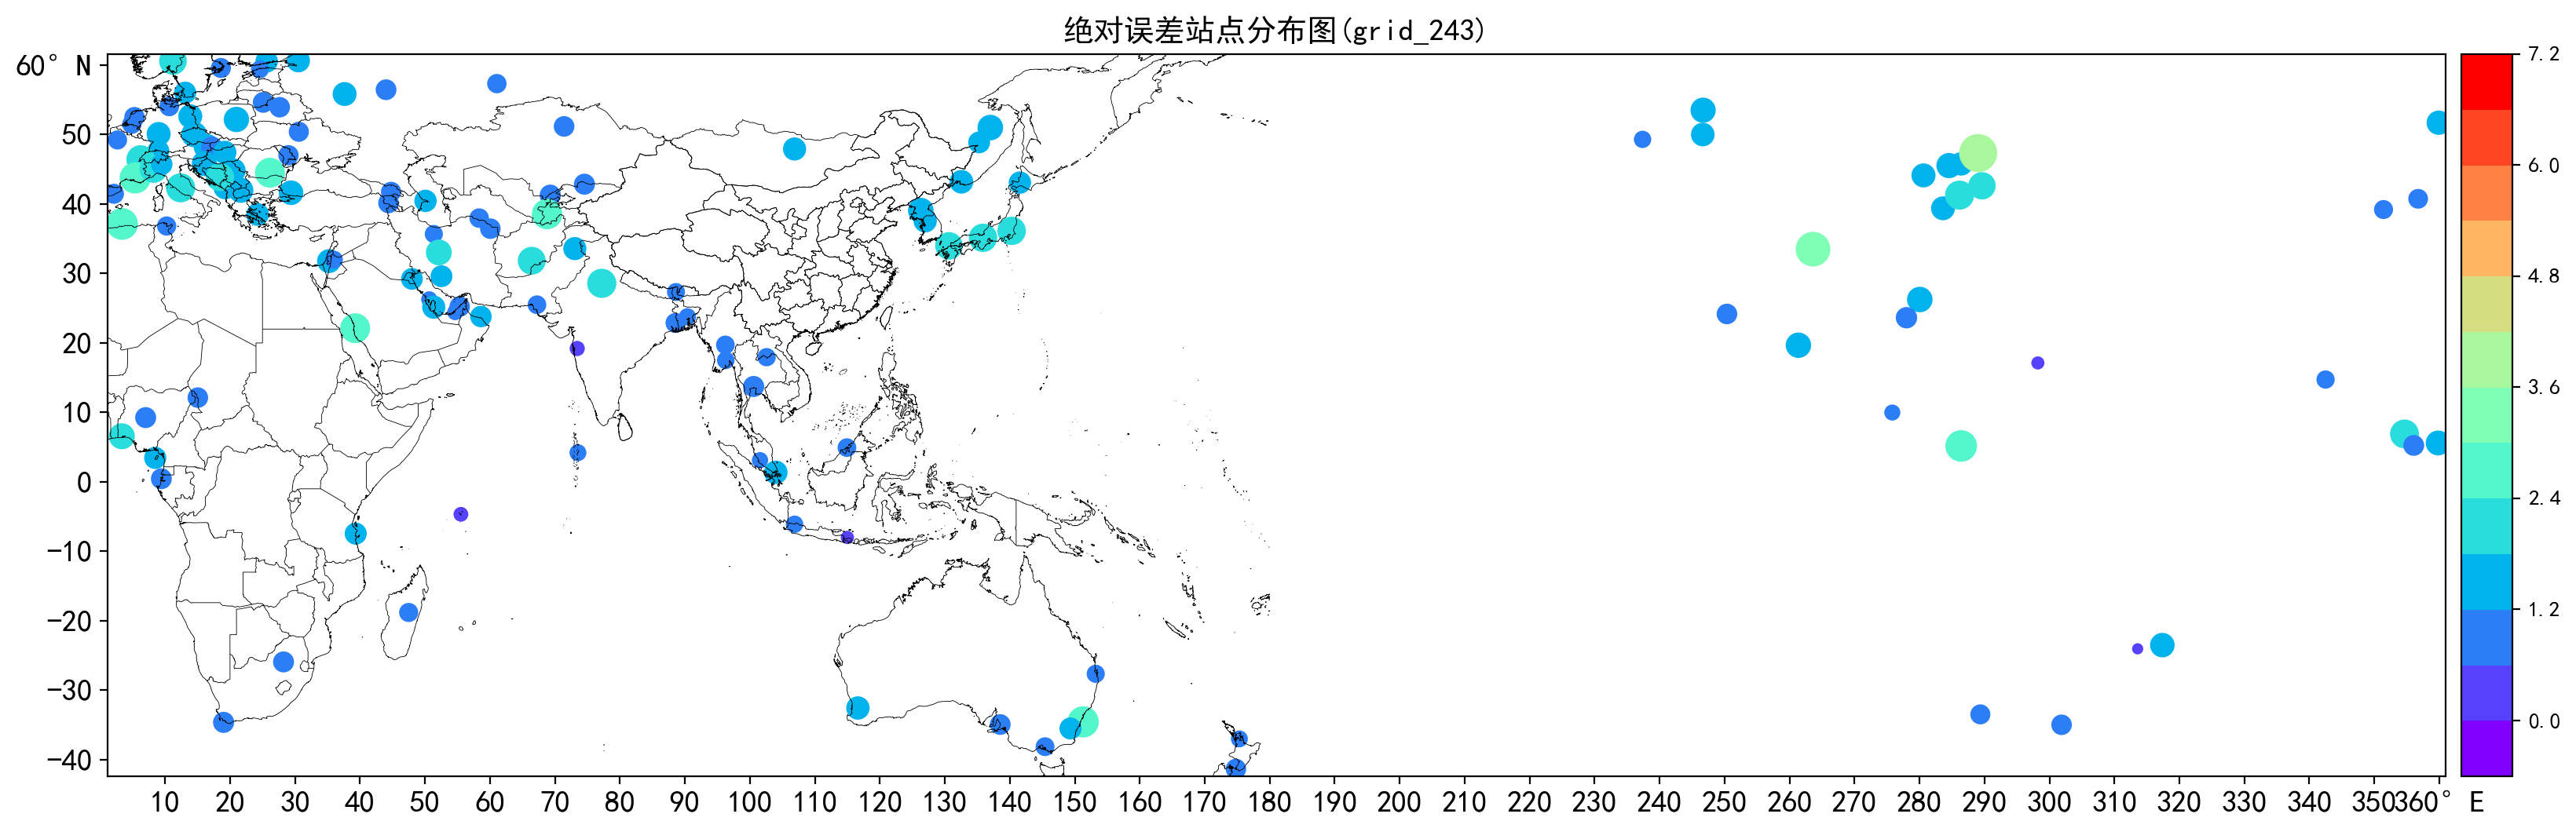

误差绝对值前1的站点：
id:40848   lon:52.53  lat:29.6 value:6.9640655517578125


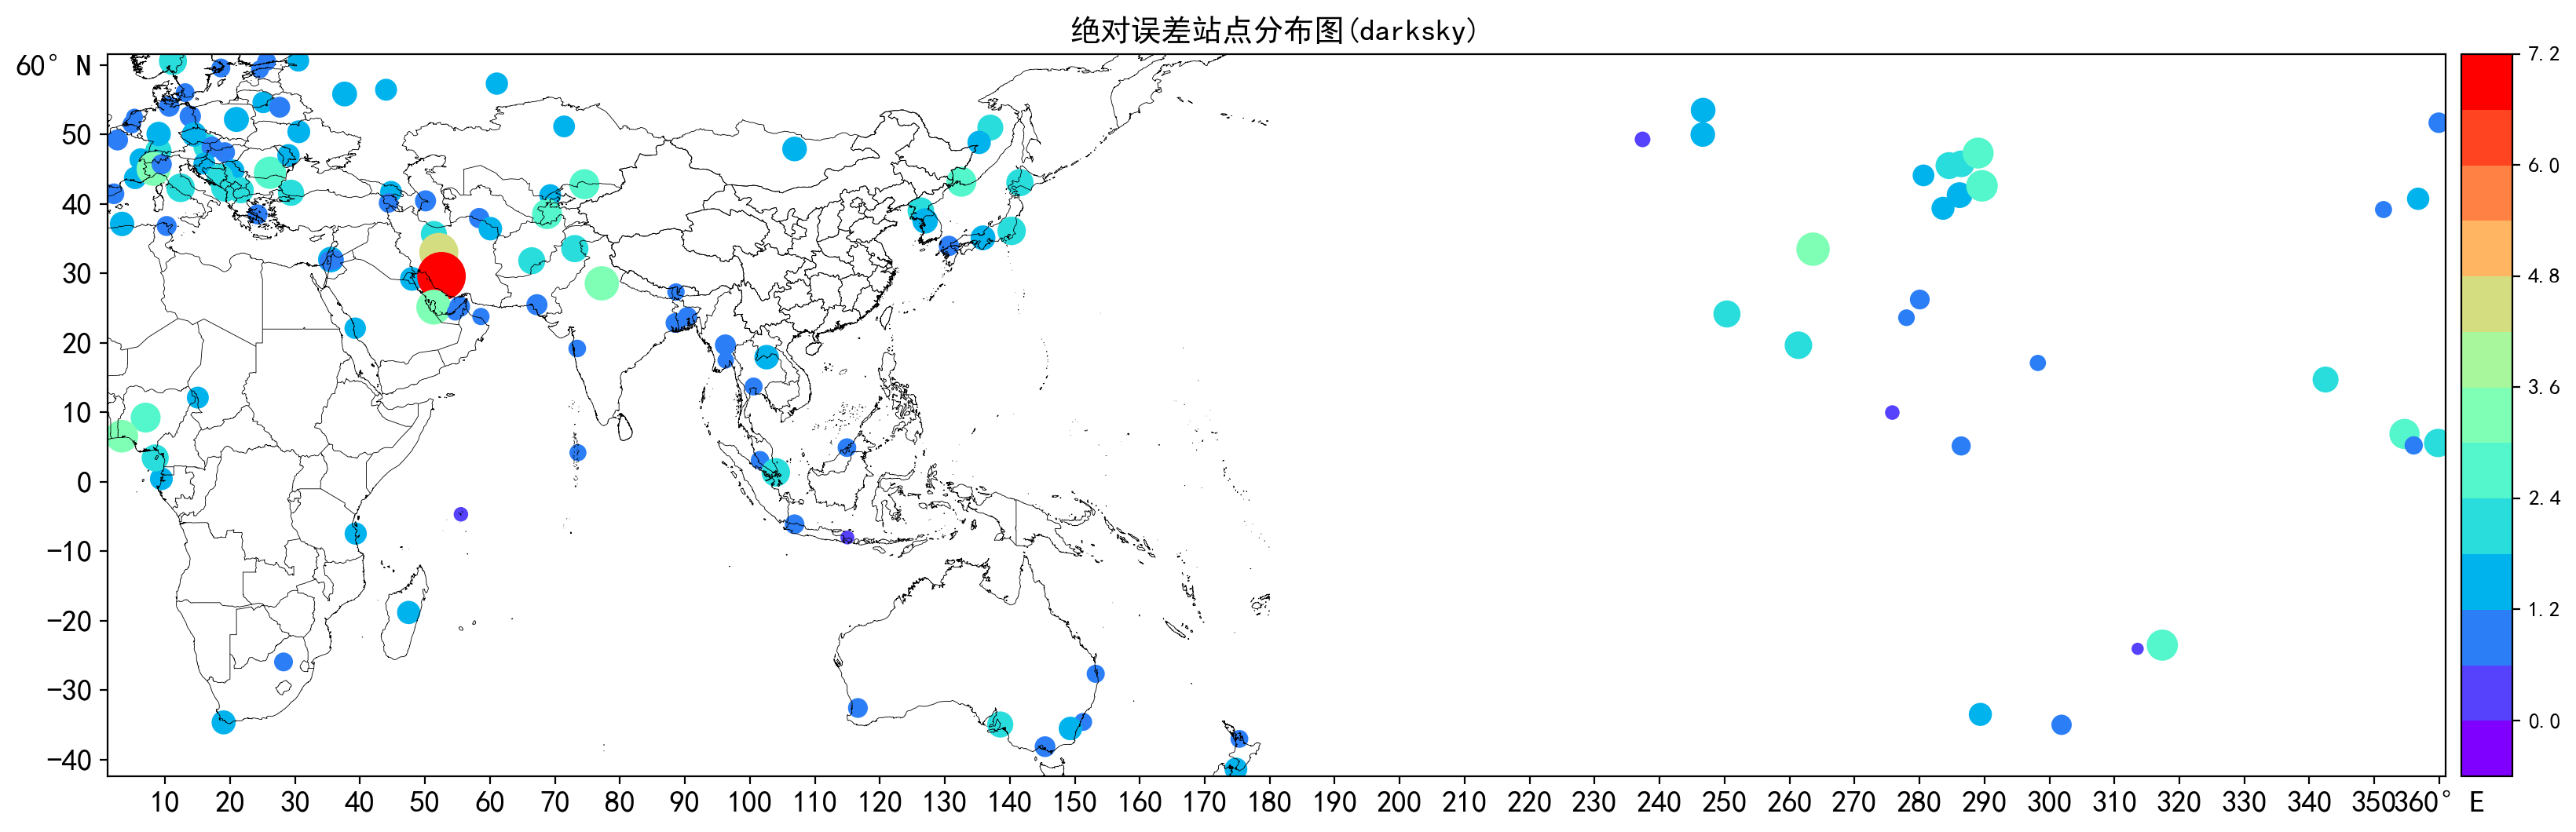

In [35]:
mpd.error_ana_scatter.mae_scatter(sta_all_c)